In [2]:
import skimage
from skimage import data, io, filters
import os

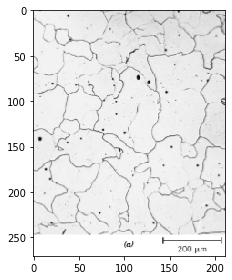

In [4]:
grains = io.imread('grains.png')
io.imshow(grains)
io.show()

In [5]:
grains.dtype

dtype('uint8')

In [6]:
grains.shape

(271, 212, 4)

The image should now only contain 2 colour channels. Image shape= (271, 212)


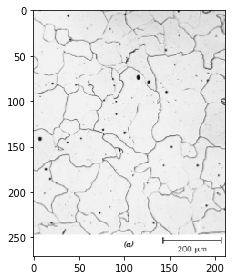

In [8]:
#need to convert to grayscale

from skimage.color import rgb2gray

grains_g = rgb2gray(grains)
io.imshow(grains_g)
print('The image should now only contain 2 colour channels. Image shape=', grains_g.shape)

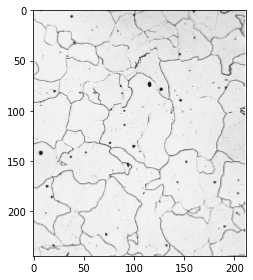

In [15]:
#now let's chop off the scale bar
image = grains_g[0:245]
io.imshow(image)

(-0.5, 211.5, 244.5, -0.5)

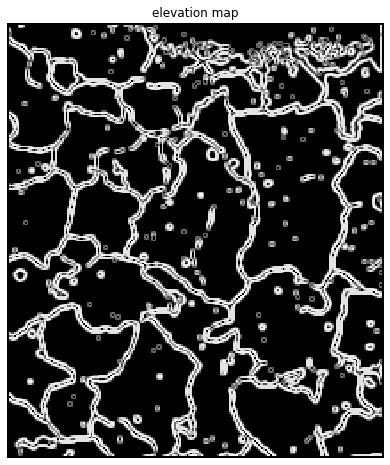

In [60]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.filters import sobel

elevation_map = sobel(image)

fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(elevation_map, cmap=plt.cm.gray)
ax.set_title('elevation map')
ax.axis('off')

(-0.5, 211.5, 244.5, -0.5)

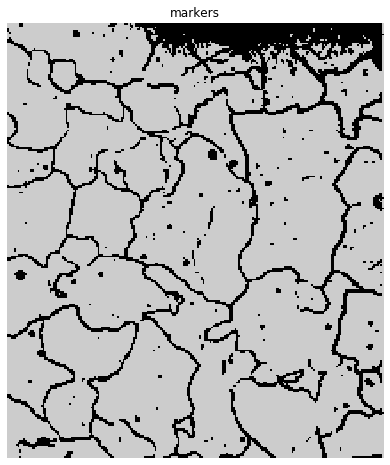

In [85]:
markers = np.zeros_like(image)
markers[image < 0.2] = 1
markers[image > 0.9] = 2

fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(markers, cmap=plt.cm.nipy_spectral)
ax.set_title('markers')
ax.axis('off')

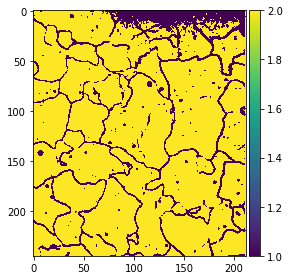

In [86]:
from skimage.morphology import watershed
segmentation = watershed(elevation_map, markers)
io.imshow(segmentation)

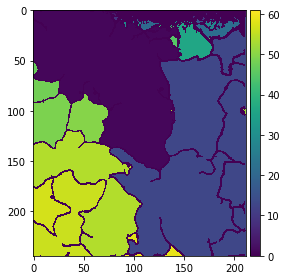

In [87]:
segmentation_n = ndi.binary_fill_holes(segmentation - 1)
labeled_grains, _ = ndi.label(segmentation_n)
io.imshow(labeled_grains)

In [130]:
from skimage import measure

properties = measure.regionprops(labeled_grains)
[prop.area for prop in properties]

[13614,
 6,
 1,
 6,
 2,
 1,
 1,
 3,
 9,
 5,
 2,
 1,
 17787,
 1,
 1,
 2,
 13,
 2,
 1,
 1,
 85,
 310,
 2,
 1,
 1,
 1,
 1,
 43,
 7,
 2,
 1,
 1,
 1,
 1,
 1,
 797,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 44,
 1,
 39,
 448,
 1428,
 1176,
 1,
 6,
 1,
 6013,
 3,
 2967,
 978,
 38,
 80,
 9,
 4]

In [131]:
av_area = np.mean([prop.area for prop in properties])
av_area

753.4262295081967

In [133]:
av_dia = (np.sqrt(av_area / np.pi)) * 2
av_dia

30.972440482637893

In [ ]:
#find length of scalebar in pixels

Scale bar is around 66 pixels in length. Thus, 1 pixel is equal to 3.0303030303030303 microns.


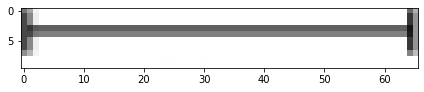

In [127]:
scalebar = grains_g[250:260, 142:208]
io.imshow(scalebar)
print('Scale bar is around', 208 - 142, 'pixels in length. Thus, 1 pixel is equal to', 200/66, 'microns.' )

In [134]:
print('The average diameter of the grains is', 200/66 * av_dia, 'microns.')

The average diameter of the grains is 93.85588025041785 microns.
